In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model, Sequential

In [7]:
x = []
y_max = []
y_mean = []

path = 'H:/Skripsi/Research'
os.chdir(path)
for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if '.csv' in a and '(freeze)' in a and 'Large' in a:
            path_csv=( p +'\\'+a)
            df = pd.read_csv(path_csv)
            print(a + " =================================")
            print("Akurasi Min = " + str(df["accuracy"].min()))
            print("Akurasi mean = " + str(df["accuracy"].mean()))
            print("Loss Min = " + str(df["loss"].min()))
            print("Loss mean = " + str(df["loss"].mean()))
            print(" =================================")
            print("")


MobileNetV3 Large 0.75 DA (freeze).csv =================================
Akurasi Min = 0.3908666670322418
Akurasi mean = 0.4918835546573003
Loss Min = 1.9616405963897705
Loss mean = 2.055742163658142

MobileNetV3 Large 0.75 TA (freeze).csv =================================
Akurasi Min = 0.4957333207130432
Akurasi mean = 0.6032693338394165
Loss Min = 1.7133212089538574
Loss mean = 1.8208542656898499

MobileNetV3 Large 1.0 DA (freeze).csv =================================
Akurasi Min = 0.4025333225727081
Akurasi mean = 0.5136595551172892
Loss Min = 1.8727754354476929
Loss mean = 1.9789369368553162

MobileNetV3 Large 1.0 TA (freeze).csv =================================
Akurasi Min = 0.5206666588783264
Akurasi mean = 0.6275675547122955
Loss Min = 1.6100462675094604
Loss mean = 1.7251222920417786



In [5]:
df = pd.read_csv("H:/Skripsi/Research/tanpa cutout/MobileNetV3 Large 1.0 DA frezee no_cutout.csv")
print("tanpa cutout" + " =================================")
print("Akurasi Max = " + str(df["accuracy"].max()))
print("Akurasi mean = " + str(df["accuracy"].mean()))
print("Loss Min = " + str(df["loss"].min()))
print("Loss mean = " + str(df["loss"].mean()))
print(" =================================")
print("")

tanpa cutout =================================
Akurasi Max = 0.5850666761398315
Akurasi mean = 0.5682400000095368
Loss Min = 1.7511672973632812
Loss mean = 1.8668119883537293



In [7]:
model = load_model("H:\Skripsi\Research\MobileNetV3 Large 1.0\MobileNet V3 Large 1.0 TA (freeze)\MobileNetV3 Large 1.0 TA (freeze).h5")


In [8]:
model.layers[0].summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

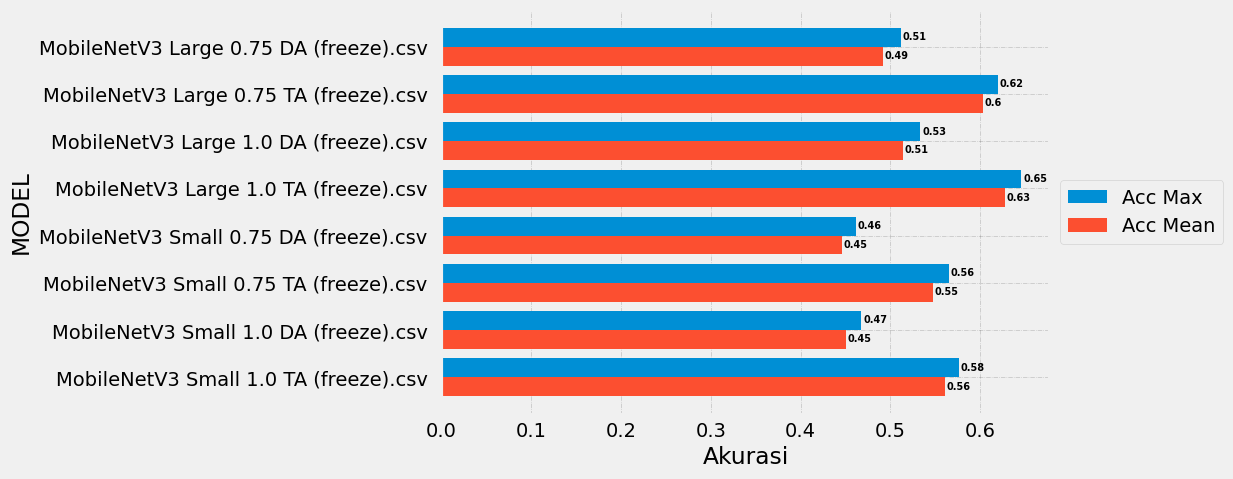

In [23]:

x = []
y_max = []
y_mean = []

path = 'H:/Skripsi/Research'
os.chdir(path)
for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if '.csv' in a and '(freeze)' in a:
            x.append(a)
            path_csv=( p +'\\'+a)
            df = pd.read_csv(path_csv)
            y_max.append(df["accuracy"].max())
            y_mean.append(df["accuracy"].mean())

fig, ax = plt.subplots(figsize = (7, 5))

X_axis = np.arange(len(x))

plt.barh(X_axis - 0.2, y_max, 0.4, label = 'Acc Max')
plt.barh(X_axis + 0.2, y_mean, 0.4, label = 'Acc Mean')

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(visible = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.002, i.get_y()+0.25,
        str(round((i.get_width()), 2)),
        fontsize = 7, fontweight ='bold',
        color ='black')

plt.yticks(X_axis, x)
plt.xlabel("Akurasi")
plt.ylabel("MODEL")
plt.title("")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


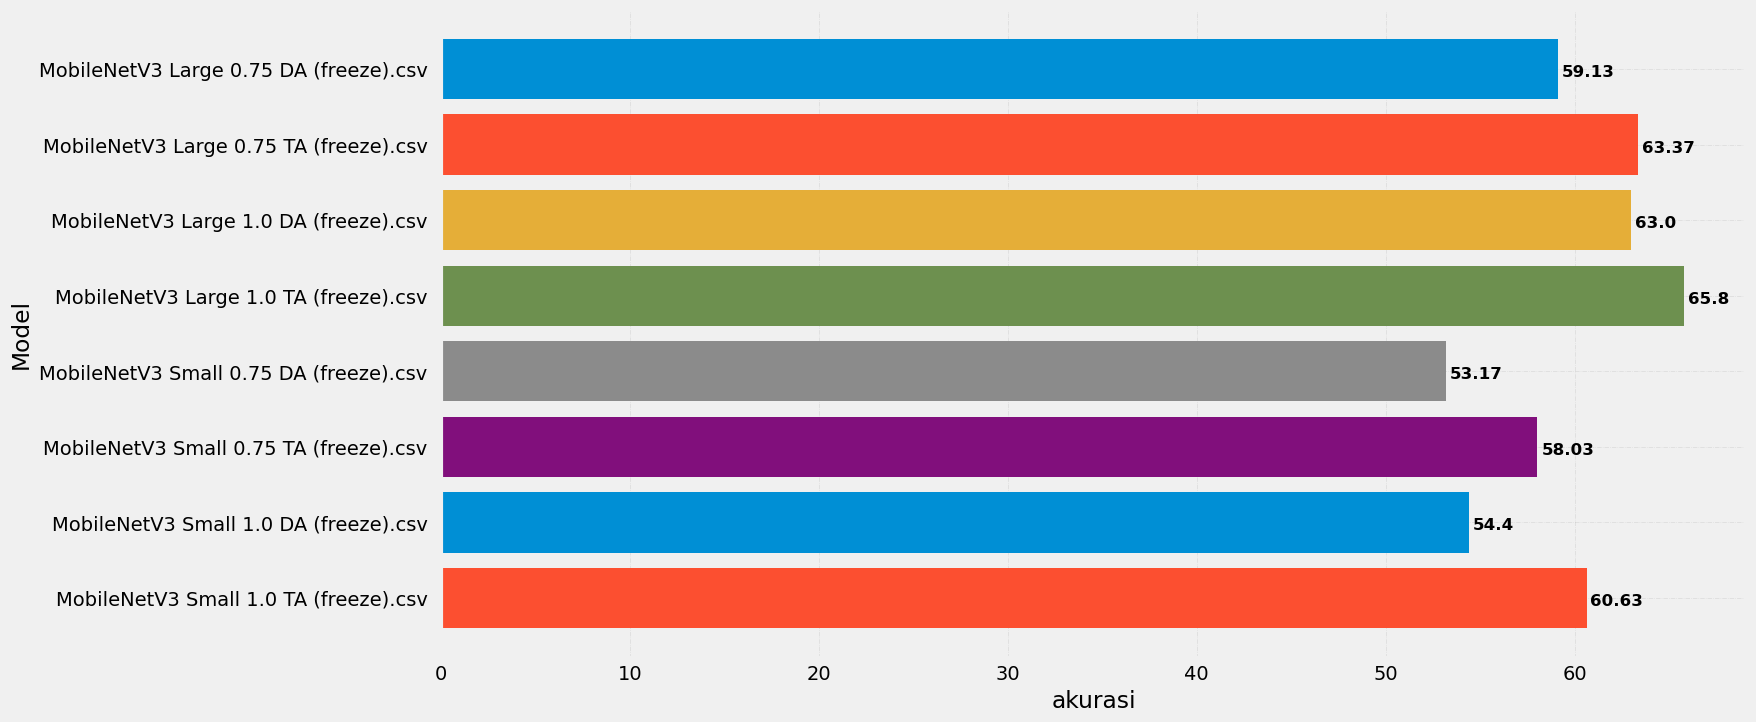

In [24]:
path = 'H:/Skripsi/Research'
os.chdir(path)

fig, ax = plt.subplots(figsize = (15, 8))


for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if '.csv' in a and '(freeze)' in a:
            path_csv=( p +'\\'+a)

            df = pd.read_csv(path_csv)
            df.rename(columns={"Unnamed: 0": "epoch"}, inplace = True)

            df2 = df["val_accuracy"].max()
            df2_str = str(df2*100)
            ax.barh(a.split("\\")[-1], df2*100)




ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
        str(round((i.get_width()), 2)),
        fontsize = 12, fontweight ='bold',
        color ='black')



plt.xlabel("akurasi")
plt.ylabel("Model")
plt.title("", loc ='left',fontsize = 20)
plt.show()

PLOTING VALIDATION ACCURACY

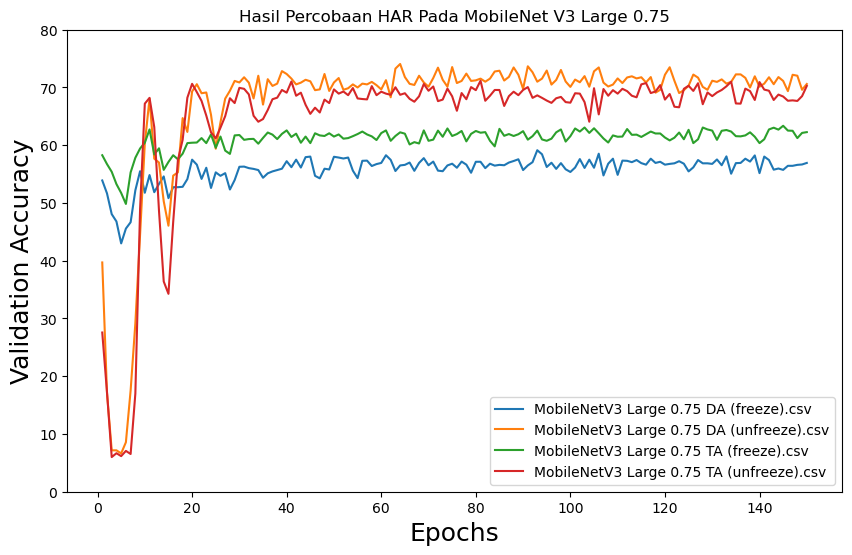

In [4]:
path = 'H:/Skripsi/Research/MobileNetV3 Large 0.75'
os.chdir(path)

plt.style.use('default')
fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(10,6))

for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if a.endswith('.csv'):
            path_csv=( p +'\\'+a)

            df = pd.read_csv(path_csv)
            df.rename(columns={"Unnamed: 0": "epoch"}, inplace = True)
            axes.plot(df["epoch"]+1, df["val_accuracy"]*100, label=a.split("\\")[-1])

axes.set_title('Hasil Percobaan HAR Pada MobileNet V3 Large 0.75')
axes.set_xlabel('Epochs', fontsize=18)
axes.set_ylabel('Validation Accuracy', fontsize=18)
plt.ylim(0, 80)

axes.legend()

Overall Accucaracy

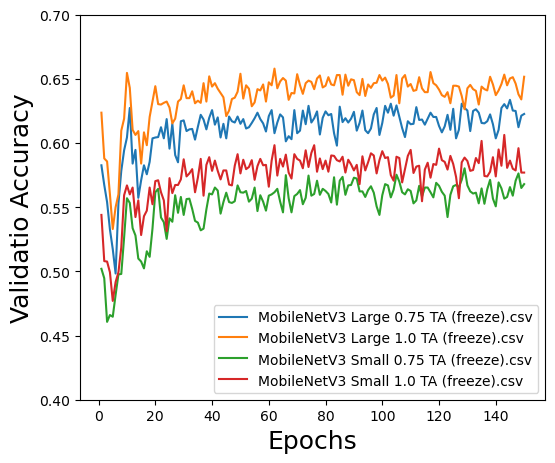

In [9]:
path = 'H:/Skripsi/Research'
os.chdir(path)

#pilih salah satu dari string dibawah!
#"DA" --> untuk data Dengan Augmentation
#"TA" --> untuk data Tanpa Augmentation
#""   --> kosongkan untuk melihat semua tipe data
data = "Large" 


#pilih salah satu dari string dibawah!
#"(freeze)"   --> untuk model dengan bobot yang dibekukan
#"(unfreeze)" --> untuk model dengan bobot yang tidak dibekukan
#""           --> kosongkan untuk melihat berbagai model

bobot = "(freeze)"

plt.style.use('default')
fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(6,5))

for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if ".csv" in a and data in a and bobot in a:
            path_csv=( p +'\\'+a)
            df = pd.read_csv(path_csv)

            df.rename(columns={"Unnamed: 0": "epoch"}, inplace = True)
            axes.plot(df["epoch"]+1, df["val_accuracy"], label=a.split("\\")[-1])


#axes.set_title('Hasil Percobaan HAR Pada MobileNet V3 Small')
axes.set_xlabel('Epochs', fontsize=18)
axes.set_ylabel('Validatio Accuracy', fontsize=18)
plt.ylim(0.4,0.7)
#axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.legend()
plt.show()

In [17]:

def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data['accuracy']
    tloss=tr_data['loss']
    vacc=tr_data['val_accuracy']
    vloss=tr_data['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    #axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    #axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss

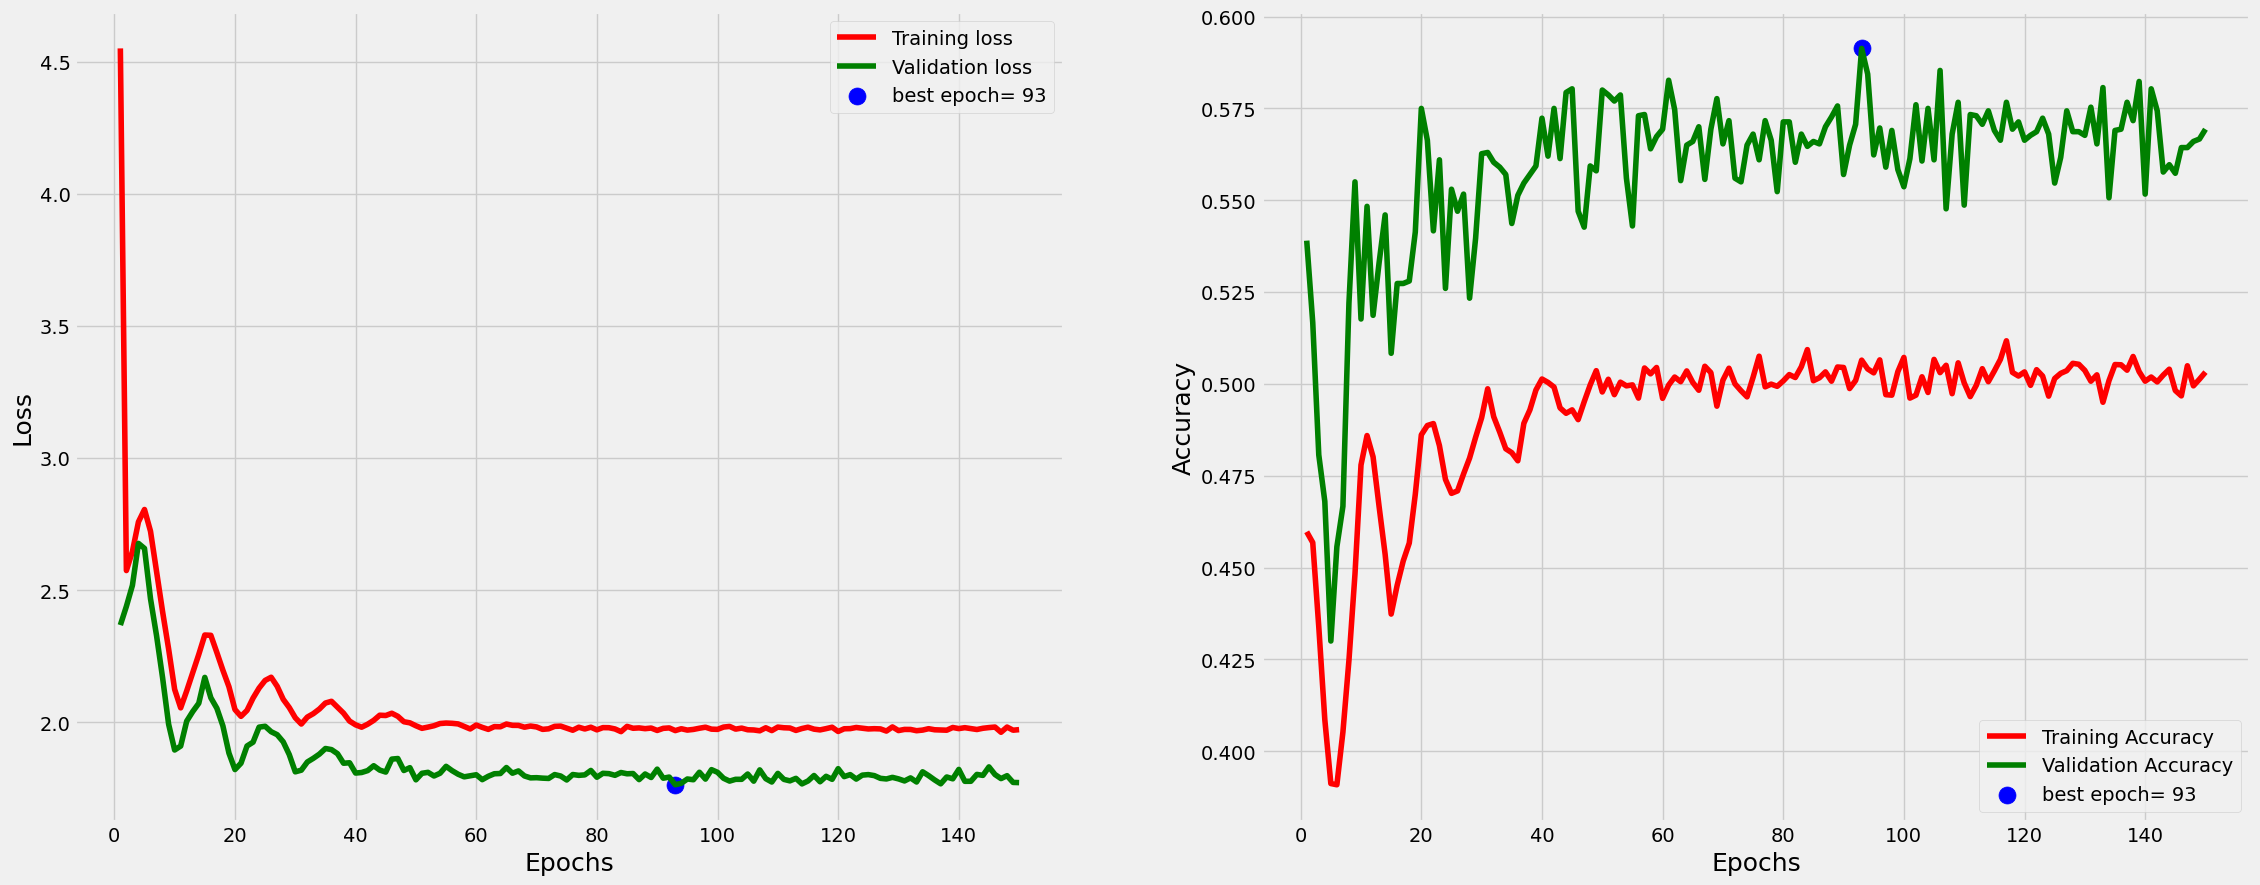

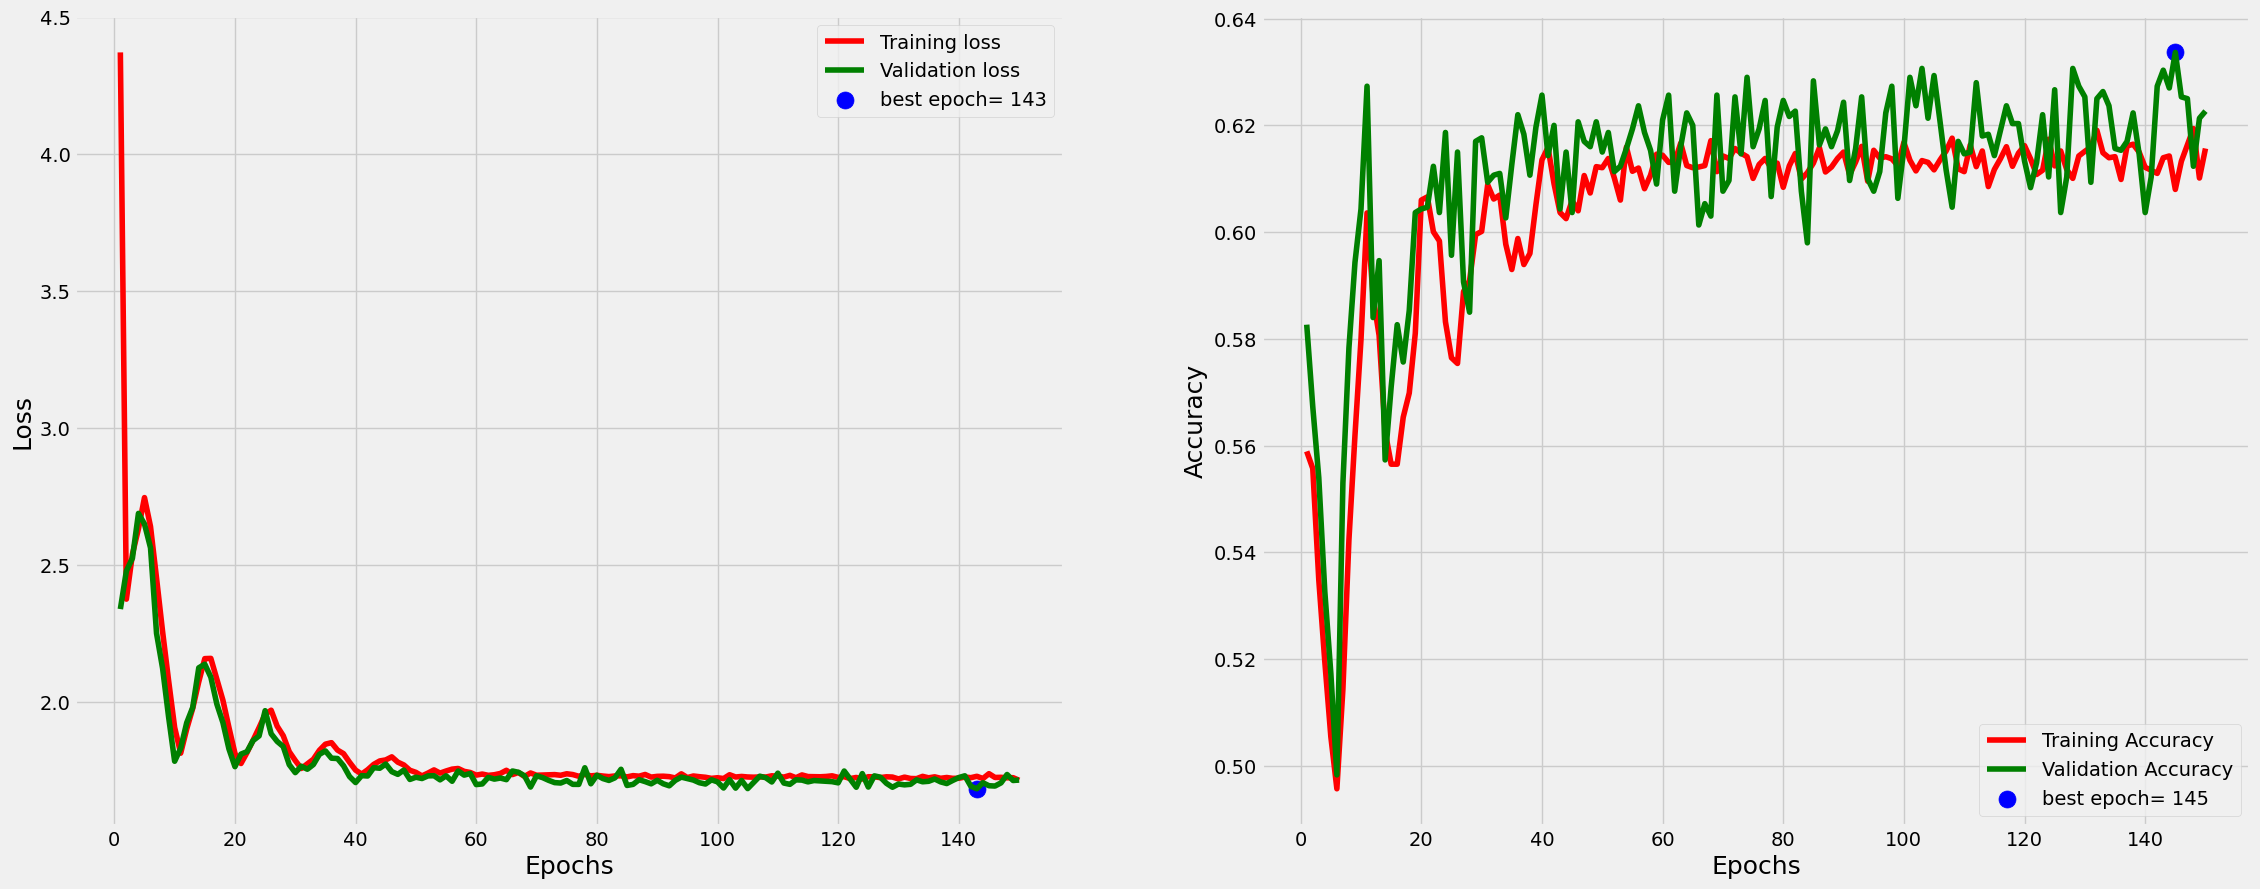

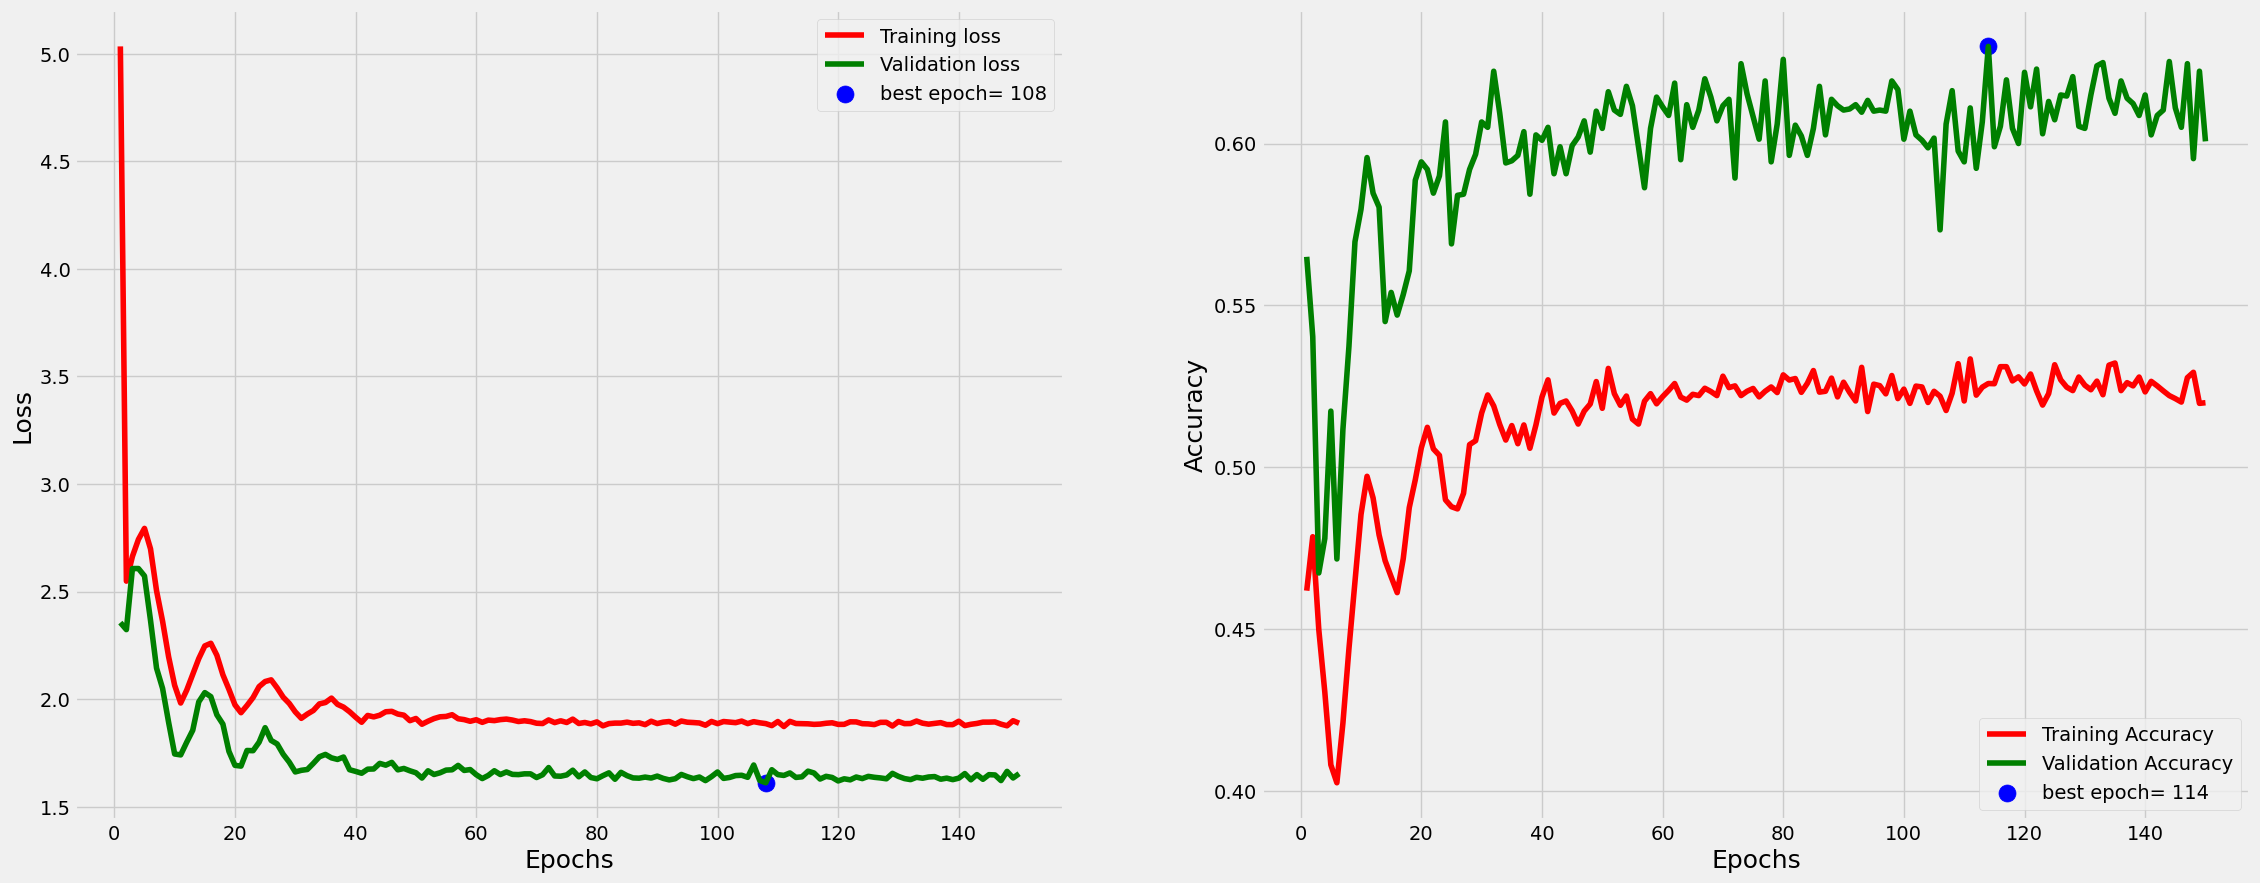

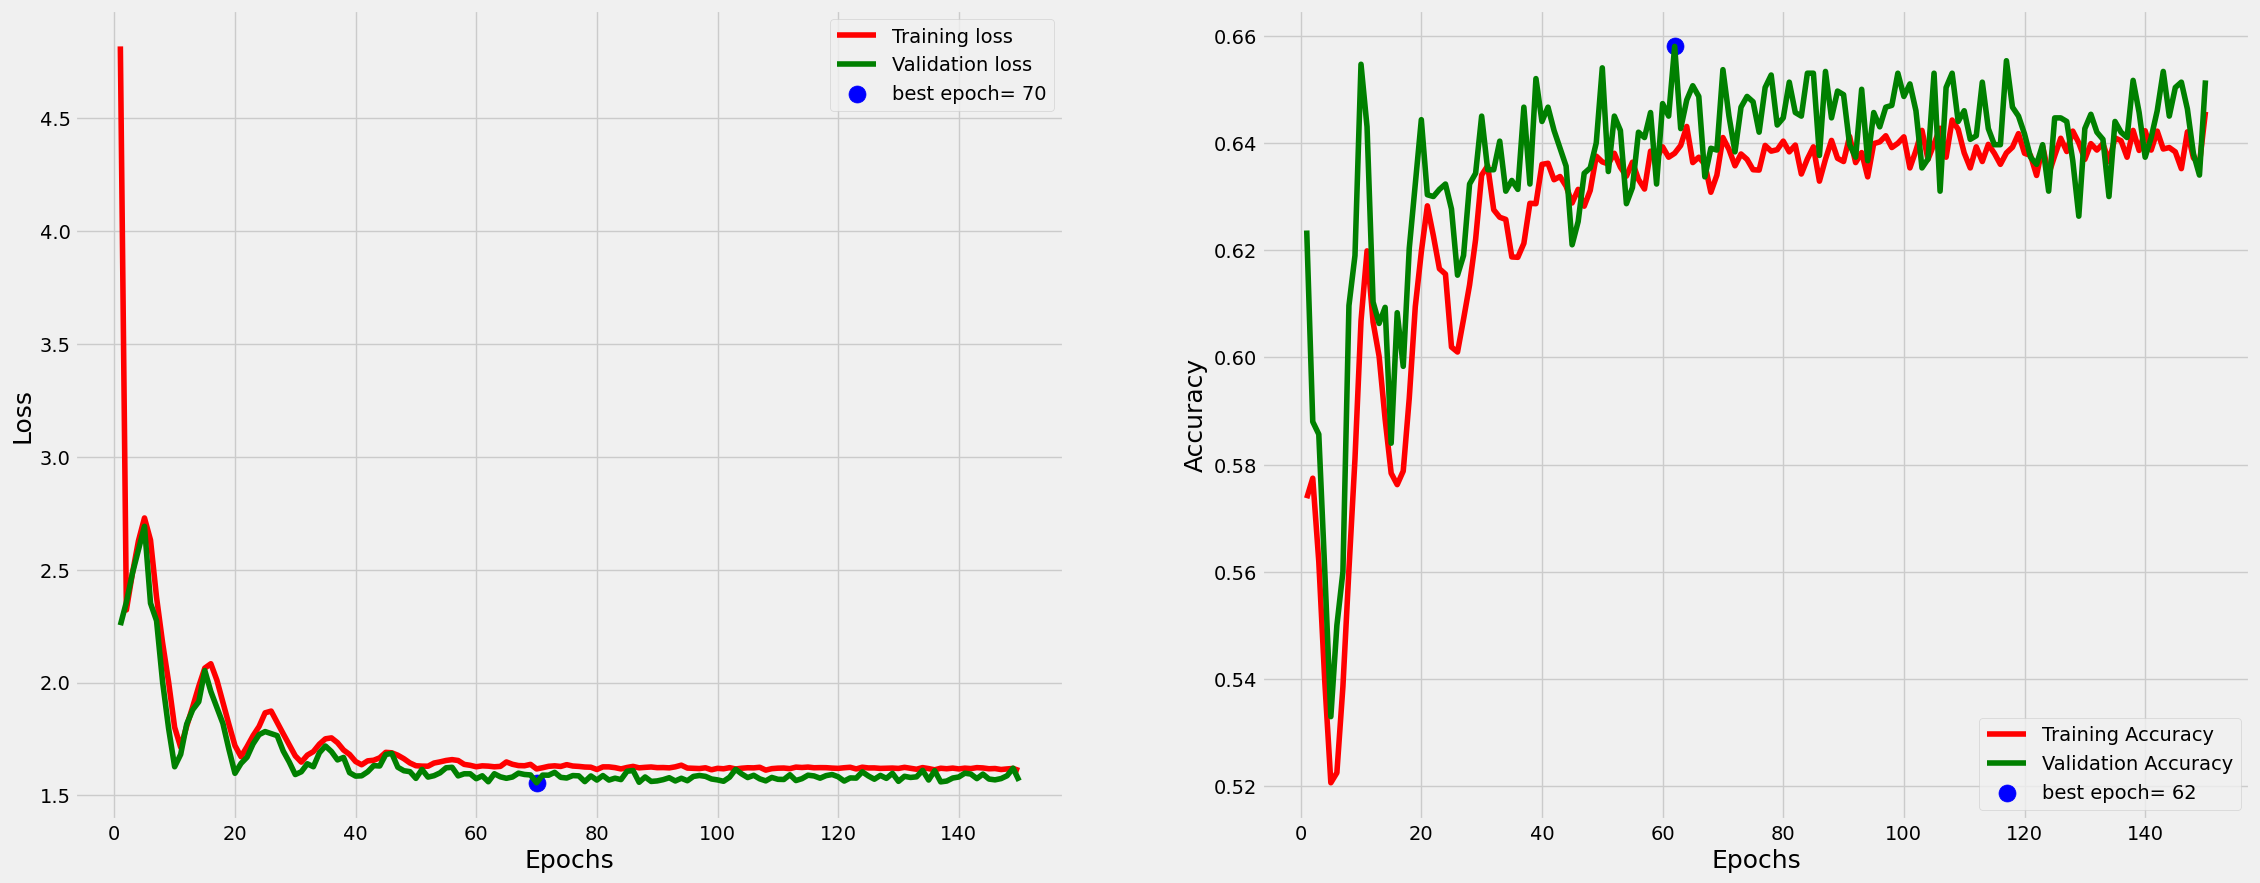

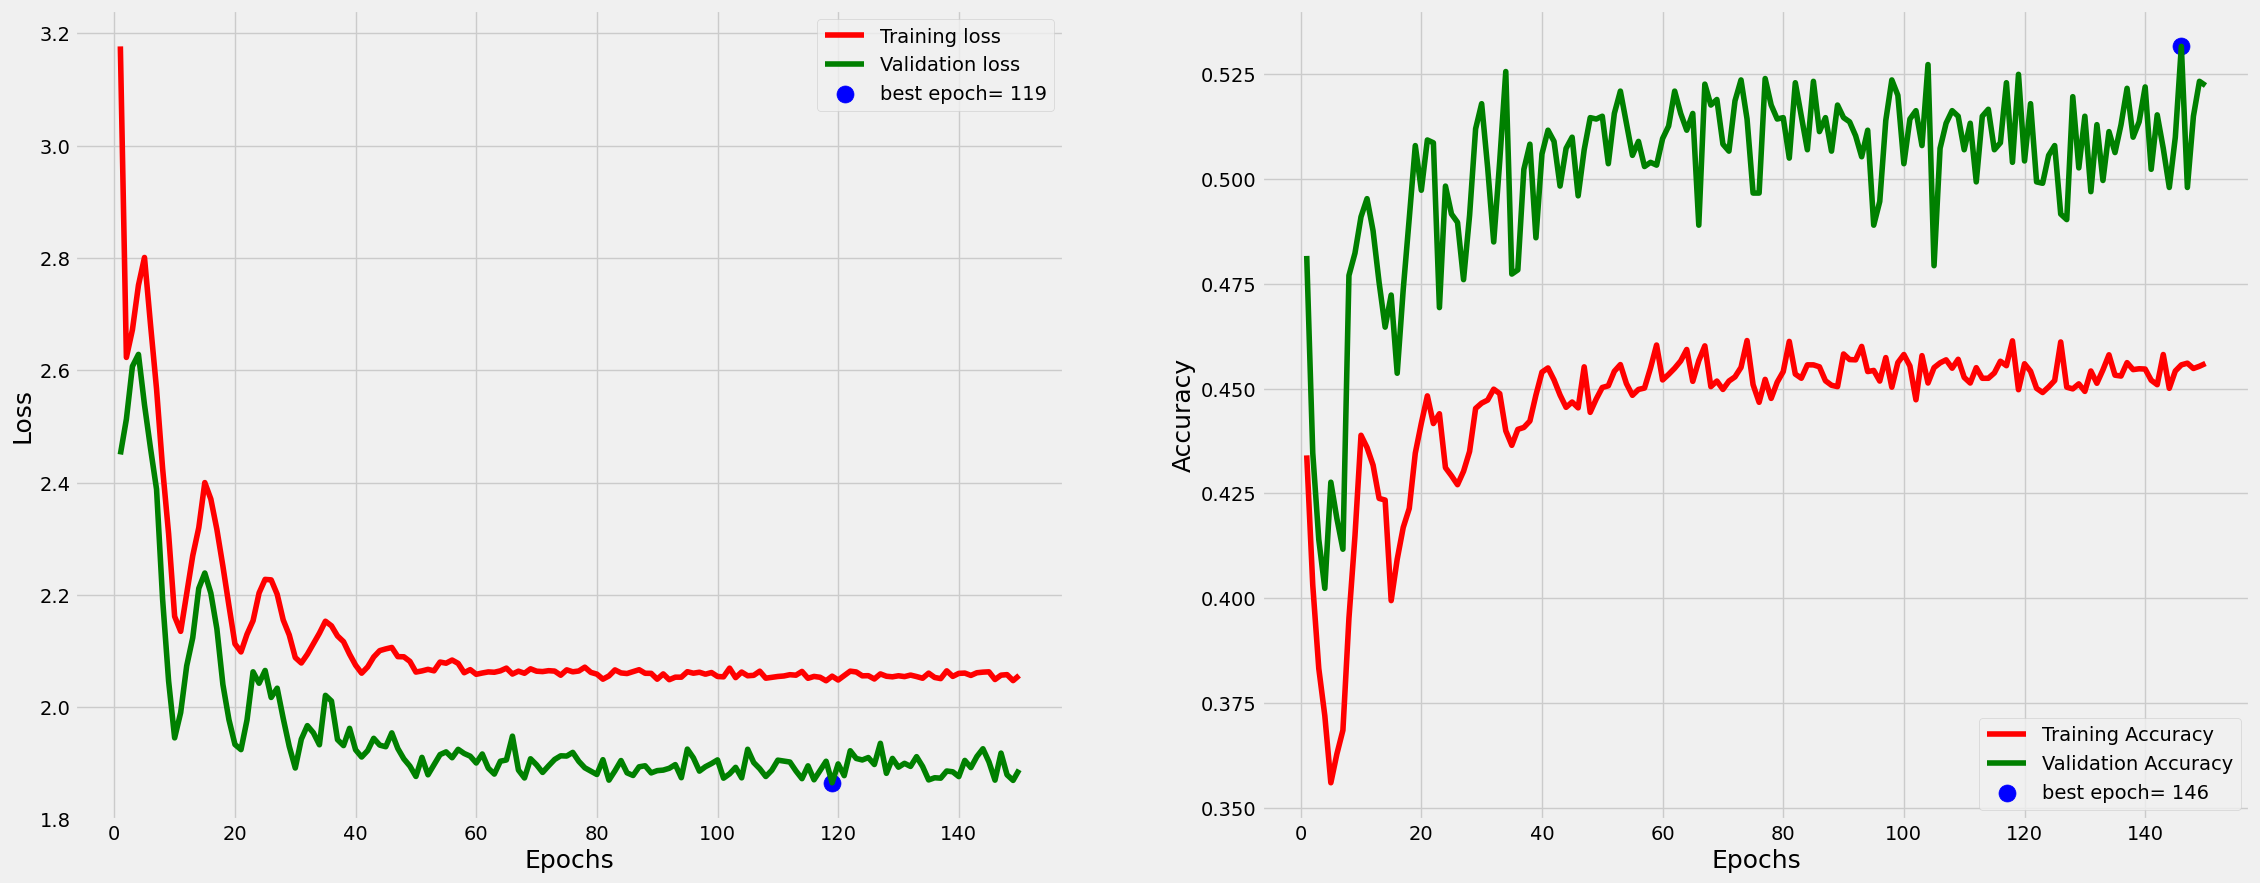

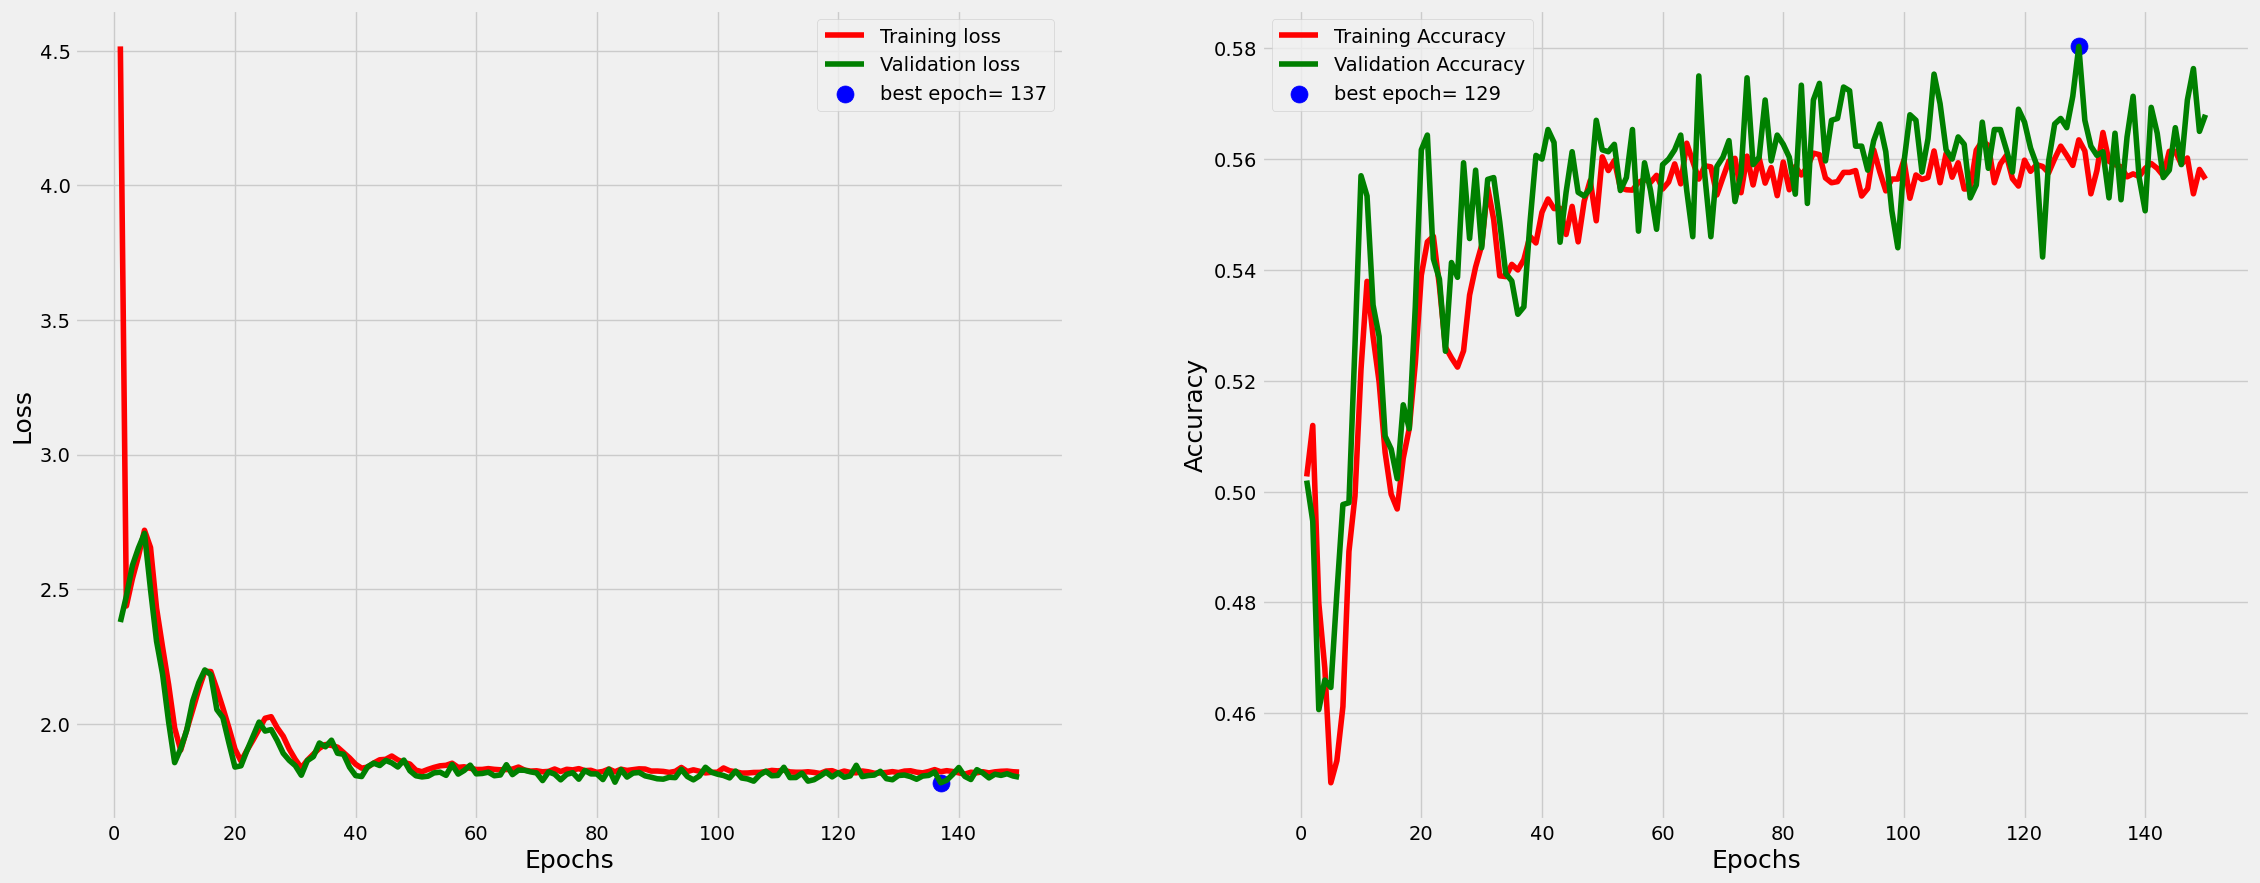

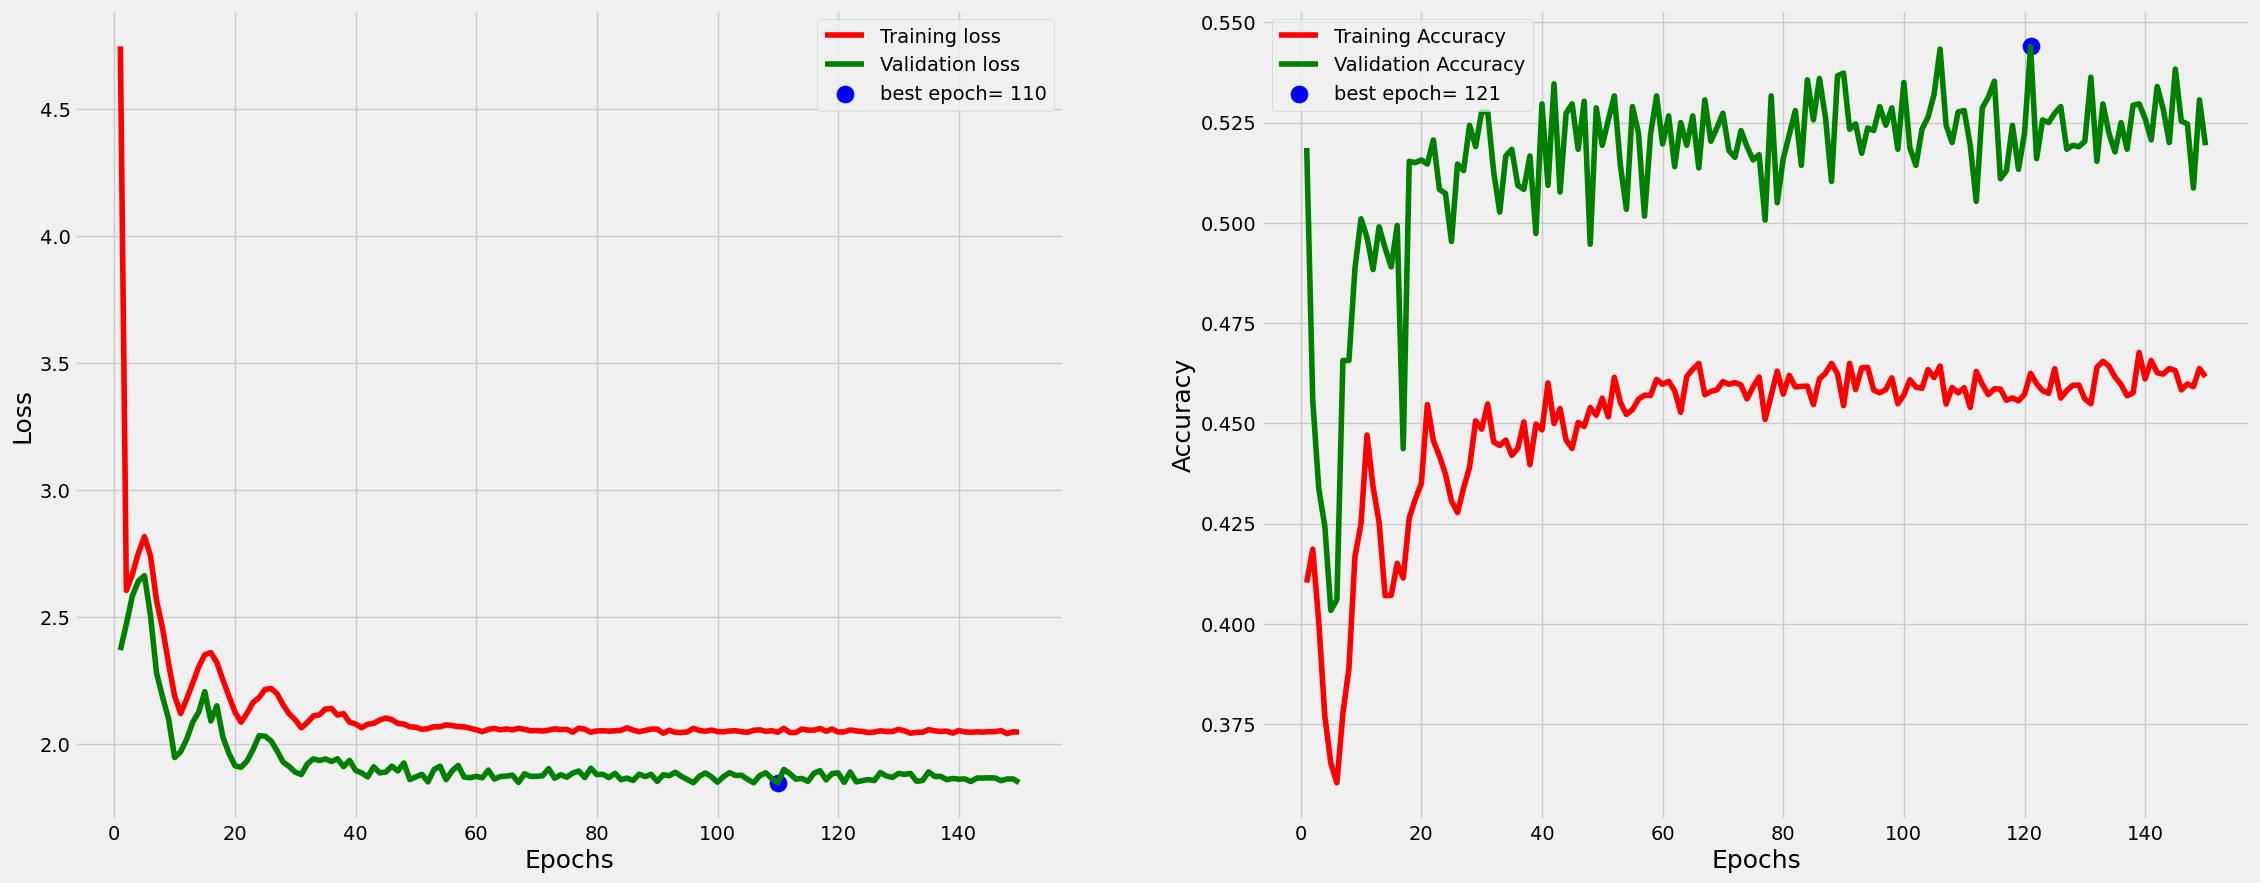

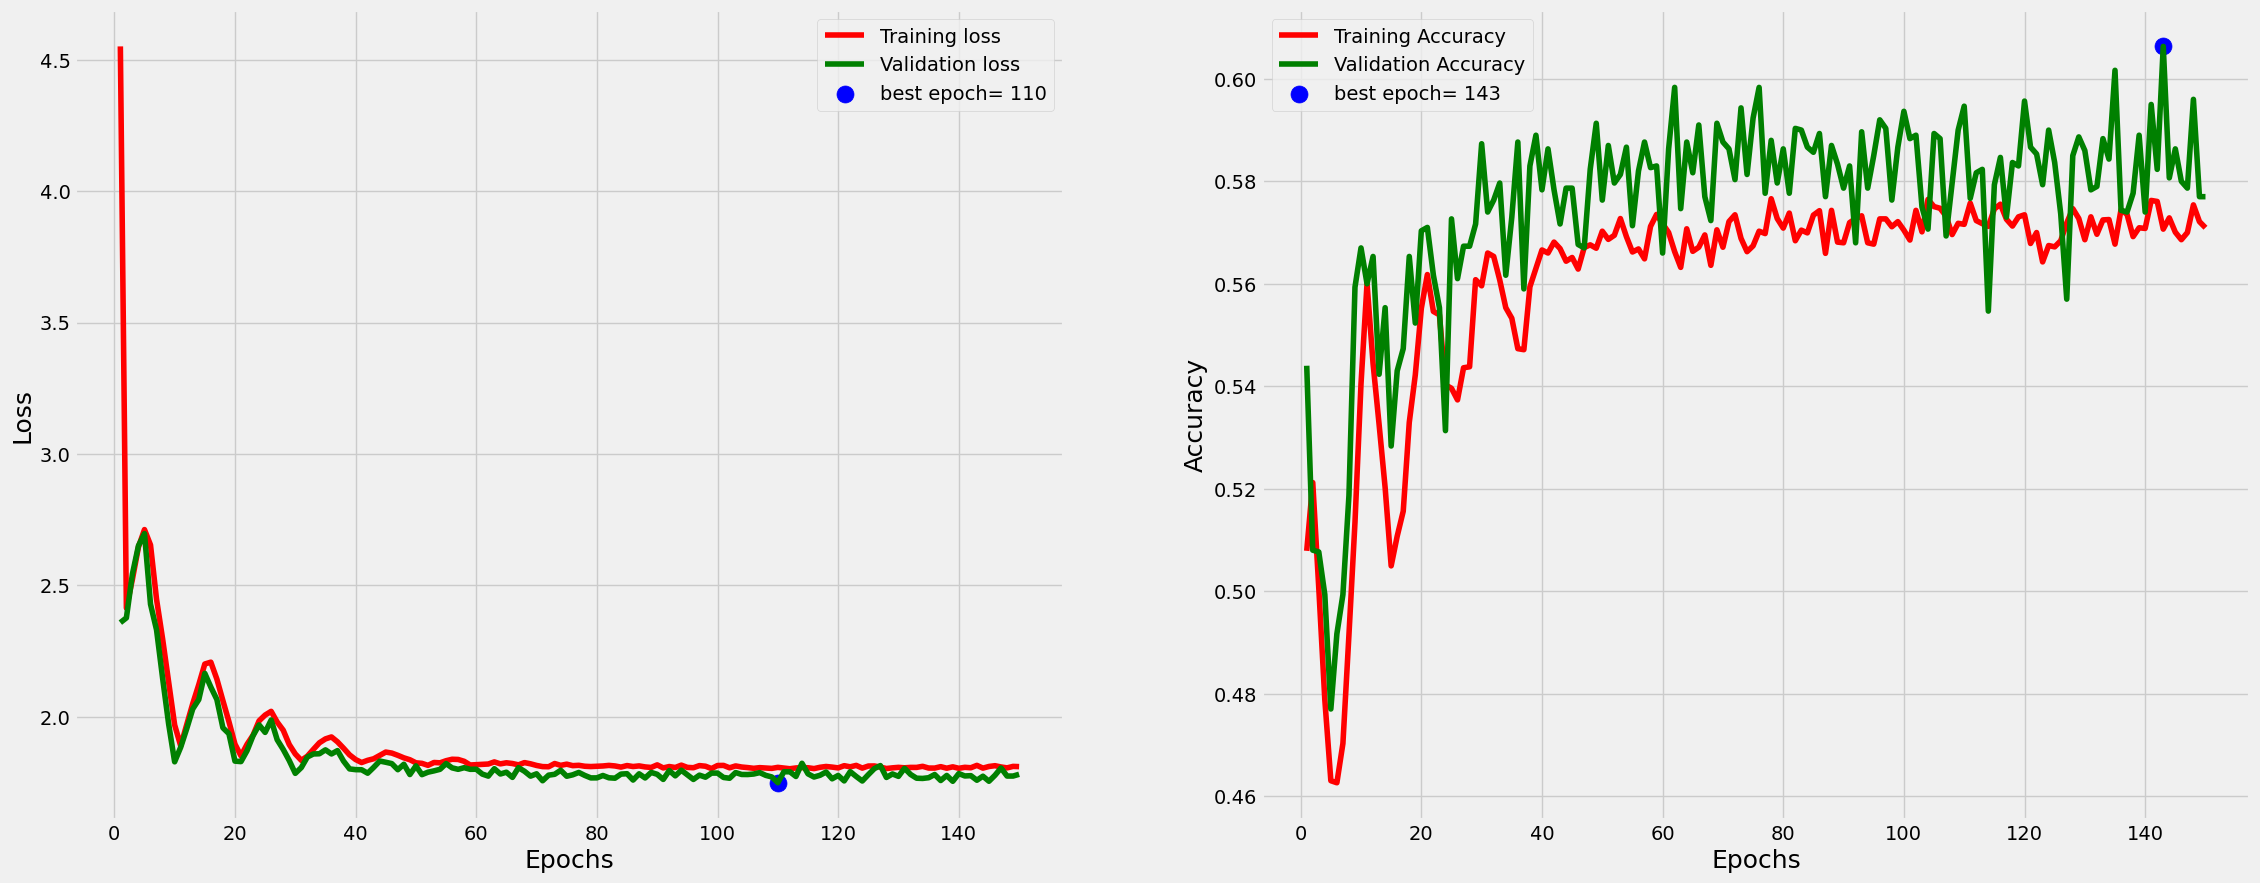

In [18]:
path = 'H:/Skripsi/Research'
for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if ".csv" in a  and "(freeze)" in a:
            path_csv=( p +'\\'+a)
            df = pd.read_csv(path_csv)
            loss_index=tr_plot(df,0)

            